In [75]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_honorifics.csv")

In [76]:
# isolate the question portion of the dataset
questions = data.iloc[:,7:24]
questions = questions.fillna("I don't know")
#questions = questions.lower()
vocab = []
qcols = []
# get questions column names
for question in range(1,18):
    qcols.append("Q"+str(question))

# get total unique responses in survey
stackedDf = questions.stack()
vocab = stackedDf.unique()

In [77]:
# make a dict to map words to numbers
dict = {}
for val in range(len(vocab)):
    dict[vocab[val]]=val
dict

{'Grandma': 0,
 'stone': 1,
 'Teacher': 2,
 'Teacup': 3,
 'Thought': 4,
 'Cat': 5,
 'Strawberry cake': 6,
 'car': 7,
 'Customer': 8,
 'Father': 9,
 'Employee': 10,
 'Murderer': 11,
 'Car': 12,
 "I don't know": 13,
 'other': 14,
 'Listener': 15,
 'grandma': 16,
 'Grandmother': 17,
 'Mother': 18,
 'father': 19,
 'Professor': 20,
 'Area': 21,
 'Hand': 22,
 'A': 23,
 'Other': 24,
 'Busan/Ilsan': 25,
 'Server': 26,
 'Baker': 27,
 'Cat owner': 28,
 'Company': 29,
 "Customer's burden": 30,
 'B': 31,
 'Thinker of Thought': 32}

In [78]:
# map the dataframe vals to nums
df = pd.DataFrame()
for q in qcols:
    df[q] = questions[q].map(dict)
# fill nas with idks
df = df.fillna(dict["I don\'t know"])

In [79]:
# use kmeans to fit embeddings
from sklearn.cluster import KMeans
def fitKmeans(numClusters,embeddings):
    kmeans =KMeans(n_clusters = numClusters)
    kmeans.fit(embeddings)
    return kmeans
kmeans = fitKmeans(10,df).labels_
df["kmeans"] = kmeans

In [80]:
# print clusters
def printClusterSet(df,num):
    for cluster in range(num):
        print("Cluster "+str(cluster))
        print(df[df["Kmeans "+str(num)]==cluster])
        print("\n\n")

In [81]:
# look at kmeans inertias
import matplotlib.pyplot as plt
def doKmeans(df,kmeansToTest,showIntertias=True):
    # calculates inertias and kmeans clusters for each kmeans val to test
    inertias = []
    kmeansLabels = []
    for i in kmeansToTest:
        kmeans = fitKmeans(i,df)
        inertias.append(kmeans.inertia_)
        kmeansLabels.append(kmeans.labels_)

    # adds the cluster data to a df
    clusterDf = pd.DataFrame(df)
    for i in kmeansToTest:
        clusterDf['Kmeans '+str(i)] = kmeansLabels[i-kmeansToTest[0]]

    # shows graph of inertias for the user to decide where to make the cutoff
    plt.figure(figsize=(8,6))
    plt.scatter(kmeansToTest,inertias)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    
    if(showIntertias):
        plt.show()
    return clusterDf

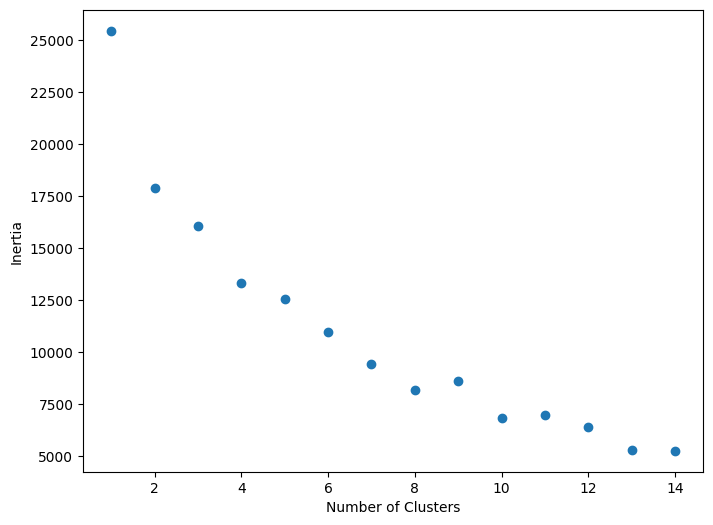

In [82]:
clusterDf = doKmeans(df,range(1,15))

In [83]:
# add age to the cluster df
clusterDf["Age"]=data["Age"]
printClusterSet(clusterDf,8)

Cluster 0
    Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Kmeans 6  Kmeans 7  \
8    4   1   2   3   1   2   4   3   5    5  ...         3         4   
9    4   1   2   3   1   2   4   3   5    5  ...         3         4   
15   4   1   2   3   1   2   4   3   5    5  ...         3         4   
18   4   1   2   3   1   2   4   3   5    5  ...         3         4   
20   4   1   2   3   1   2   4   3   5    5  ...         3         4   
22   4   1   2   3   1   2   4   3   5    5  ...         3         4   
28   0   1   2   3   1   2   4   3   5    5  ...         3         4   
29   0   1   2   3   1   2   4   3   5    5  ...         3         4   
32   0   1   2   3   1   2   4   3   5    5  ...         3         4   
34   0   1   2   3   1   2  13   3   5    5  ...         3         4   
39   0   1   2   3   1   2   4   3   5    5  ...         3         4   
40   4   1   2   3   1   2   4   3   5    5  ...         3         4   
44   4   1   2   3   1   2   4   3   5    5  ...      

In [84]:
# prints age stats for each cluster
def printClusterSetAge(df,num):
    clusterRows = []
    for cluster in range(num):
        print("Cluster "+str(cluster))
        rows = df[df["Kmeans "+str(num)]==cluster]["Age"]
        print("mean: "+ str(np.mean(rows)))
        print(rows)
        print("\n\n")
        clusterRows.append(rows)
    return clusterRows

rows2 = printClusterSetAge(clusterDf,2)
rows4 = printClusterSetAge(clusterDf,4)
rows8 = printClusterSetAge(clusterDf,8)

Cluster 0
mean: 26.372093023255815
0     21.0
1     23.0
3     64.0
4     62.0
6     30.0
8     20.0
9     22.0
10     NaN
11    24.0
14    20.0
15     NaN
18    21.0
19    50.0
20    47.0
21    20.0
22    21.0
23    24.0
25    22.0
27    21.0
28    19.0
29     NaN
30    22.0
31    47.0
32    22.0
34    25.0
35    23.0
36    22.0
38    24.0
39    28.0
40    23.0
41    28.0
44    22.0
46    27.0
48    24.0
49    23.0
50    24.0
52    26.0
53    21.0
54    21.0
56    21.0
59    20.0
60    20.0
61     NaN
63    18.0
64    23.0
65    20.0
66    29.0
Name: Age, dtype: float64



Cluster 1
mean: 29.5
2     63.0
5     47.0
7     21.0
12     NaN
13    20.0
16    25.0
17    23.0
24    49.0
26     NaN
33    23.0
37    25.0
42     NaN
43    23.0
45    24.0
47     NaN
51    24.0
55    23.0
57     NaN
58    23.0
62     NaN
Name: Age, dtype: float64



Cluster 0
mean: 26.25925925925926
0     21.0
4     62.0
8     20.0
9     22.0
10     NaN
11    24.0
15     NaN
18    21.0
19    50.0
20    47.0
22   

In [85]:
# ttest on clusters ages
from scipy.stats import *
print(ttest_ind(list(rows2[0]),list(rows2[1]),nan_policy="omit"))
print(f_oneway(*rows4,nan_policy="omit"))
print(f_oneway(*rows8,nan_policy="omit"))

TtestResult(statistic=-0.8899559262088101, pvalue=0.3773658821898026, df=55.0)
F_onewayResult(statistic=2.194709354515509, pvalue=0.09946310974878698)
F_onewayResult(statistic=1.5629742495875907, pvalue=0.16889915909309422)


In [86]:
# does anova and tukey test (if wanted) on age
df["Age"]=data["Age"]
def pValTest(df,colName,tukey=False):
    rows = []
    for val in df[colName].unique():
        print("val: "+str(val))
        rows.append(df[df[colName]==val]["Age"])
        print(np.mean(df[df[colName]==val]["Age"]))
        print("")
    print(f_oneway(*rows,nan_policy="omit"))
    print()
    if tukey:
        print(tukey_hsd(*rows))

for q in qcols:
    print(q)
    pValTest(df,q)

Q1
val: 0
28.61111111111111

val: 4
24.65

val: 13
24.0

F_onewayResult(statistic=0.809077233328069, pvalue=0.4505925630429597)

Q2
val: 1
26.673076923076923

val: 13
32.0

val: 15
nan

F_onewayResult(statistic=nan, pvalue=nan)

Q3
val: 2
27.196428571428573

val: 13
24.0

F_onewayResult(statistic=0.07595227766755085, pvalue=0.7838924147523991)

Q4
val: 3
26.274509803921568

val: 13
32.0

val: 15
47.0

F_onewayResult(statistic=2.2100330327824604, pvalue=0.11952433427857226)

Q5
val: 1
26.372093023255815

val: 16
29.923076923076923

val: 13
24.0

F_onewayResult(statistic=0.5137226575248717, pvalue=0.601158568451549)

Q6
val: 2
26.87037037037037

val: 18
36.0

val: 13
24.0

F_onewayResult(statistic=0.6487231490669769, pvalue=0.5267377882882158)

Q7
val: 4
25.564102564102566

val: 13
27.583333333333332

val: 15
53.333333333333336

val: 32
19.666666666666668

F_onewayResult(statistic=8.291681550476016, pvalue=0.00012868932909781148)

Q8
val: 3
26.295454545454547

val: 17
30.5

val: 13
24.0


/var/folders/32/14wzkv1d38q3fxdwkkhh_dcr0000gn/T/ipykernel_2191/1715898082.py:10: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  print(f_oneway(*rows,nan_policy="omit"))


In [87]:
# looks at Q16 bc there was a significant anova diff
df[["Q16","Age"]]
d = data[["Q16","Age"]].dropna()
pValTest(d,"Q16",tukey=True)

val: Murderer
25.738095238095237

val: Mother
44.4

val: Listener
20.4

val: I don't know
32.0

val: Other
23.0

F_onewayResult(statistic=4.606301637481717, pvalue=0.0029334574030703015)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -18.662     0.003   -32.253    -5.071
 (0 - 2)      5.338     0.801    -8.253    18.929
 (0 - 3)     -6.262     0.840   -23.430    10.906
 (0 - 4)      2.738     0.996   -18.054    23.530
 (1 - 0)     18.662     0.003     5.071    32.253
 (1 - 2)     24.000     0.004     5.831    42.169
 (1 - 3)     12.400     0.461    -8.580    33.380
 (1 - 4)     21.400     0.103    -2.636    45.436
 (2 - 0)     -5.338     0.801   -18.929     8.253
 (2 - 1)    -24.000     0.004   -42.169    -5.831
 (2 - 3)    -11.600     0.528   -32.580     9.380
 (2 - 4)     -2.600     0.998   -26.636    21.436
 (3 - 0)      6.262     0.840   -10.906    23.430
 (3 - 1)    -12.400     0.461   -33.380     

In [88]:
print(data[["Q16","Age"]])

         Q16   Age
0   Murderer  21.0
1   Murderer  23.0
2     Mother  63.0
3     Mother  64.0
4   Murderer  62.0
..       ...   ...
62  Murderer   NaN
63  Listener  18.0
64  Listener  23.0
65  Listener  20.0
66  Murderer  29.0

[67 rows x 2 columns]


In [91]:
# checks if the types of answers in the second column are dependent on the first col value (returns p-vals)
def compareCols(q1,q2):
    q2unique = q2.unique()
    q2counts = list(q2.value_counts())
    q2percents = [x/len(q2) for x in q2counts]
    dividedCounts = []
    dividedPercents = []
    for answer in q1.unique():
        dividedCounts.append([])
        for unique in q2unique:
            dividedCounts[-1].append(list(q2[q1==answer]).count(unique))
        dividedPercents.append([x/sum(dividedCounts[-1]) for x in dividedCounts[-1]])
    p_vals = []
    for i in range(len(dividedPercents)):
        p_vals.append(chisquare(dividedPercents[i],q2percents).pvalue)
    return p_vals
    
    

In [93]:
for q1 in qcols:
    for q2 in qcols:
        if q1==q2:
            break
        p_vals = compareCols(questions[q1],questions[q2])
        for p in range(len(p_vals)):
            if p_vals[p]<0.05:
                print("Q1: "+q1)
                print("Q2: "+q2)
                print("Q1 answer: "+questions[q1].unique()[p])
                print("p-val: "+str(p_vals[p]))

Q1: Q3
Q2: Q1
Q1 answer: I don't know
p-val: 4.6588861451034285e-15
Q1: Q3
Q2: Q2
Q1 answer: I don't know
p-val: 0.025034510149960144
Q1: Q4
Q2: Q2
Q1 answer: I don't know
p-val: 0.025034510149960144
Q1: Q4
Q2: Q2
Q1 answer: Listener
p-val: 0.0003290185085717966
Q1: Q5
Q2: Q2
Q1 answer: I don't know
p-val: 0.025034510149960144
Q1: Q5
Q2: Q4
Q1 answer: I don't know
p-val: 0.025034510149960162
Q1: Q6
Q2: Q1
Q1 answer: I don't know
p-val: 4.6588861451034285e-15
Q1: Q6
Q2: Q2
Q1 answer: I don't know
p-val: 0.025034510149960144
Q1: Q6
Q2: Q3
Q1 answer: I don't know
p-val: 4.509229801533872e-16
Q1: Q6
Q2: Q4
Q1 answer: I don't know
p-val: 0.025034510149960162
Q1: Q6
Q2: Q5
Q1 answer: I don't know
p-val: 0.0003801289578694631
Q1: Q7
Q2: Q4
Q1 answer: Listener
p-val: 0.021613658534777678
Q1: Q8
Q2: Q2
Q1 answer: I don't know
p-val: 0.025034510149960144
Q1: Q8
Q2: Q4
Q1 answer: I don't know
p-val: 0.025034510149960162
Q1: Q8
Q2: Q5
Q1 answer: I don't know
p-val: 0.0003801289578694631
Q1: Q9
Q2:

In [97]:
questions[["Q4","Q2"]]
questions["Q17"].value_counts()


Q17
Car             38
I don't know    11
Father           9
Listener         8
B                1
Name: count, dtype: int64

In [68]:
q1.unique()

array(['Grandma', 'Thought', "I don't know"], dtype=object)